In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = 15,12

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_train = pd.read_csv(r'C:\Users\Aditi\Downloads\train_NIR5Yl1.csv')

In [3]:
df_train.shape

(330045, 7)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [5]:
df_train.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [6]:
df_train.nunique()

ID            330045
Tag               10
Reputation     16527
Answers           63
Username      141802
Views          82137
Upvotes         7239
dtype: int64

In [7]:
df_train.sample(5)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
187315,104639,p,986.0,4.0,32938,59402.0,61.0
131222,315077,c,385.0,6.0,108125,45776.0,45.0
127779,292201,j,4269.0,13.0,134382,73688.0,325.0
3602,245091,i,2681.0,10.0,25092,75538.0,403.0
158480,319776,c,156.0,4.0,45474,46661.0,9.0


#### Let us divide the variables into their respective data types Independent Variable

#### Ordinal Variable 
1. ID 
2. Username

#### Continuous Variable 
1. Reputation 
2. Answers 
3. Views

#### Categorical Variables
1. Tags

#### Dependent Variabe 
1. Upvotes(Continuous Variable)

In [8]:
df_train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


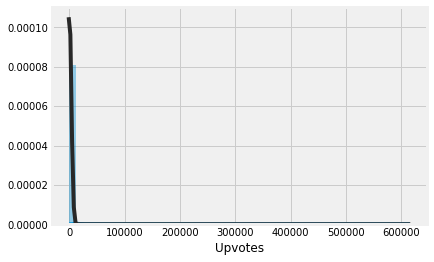

In [9]:
#histogram
from scipy.stats import norm

sns.distplot(df_train['Upvotes'], fit= norm)

In [10]:
print("Skewness: %f" % df_train['Upvotes'].skew())
print("Kurtosis: %f" % df_train['Upvotes'].kurt())

Skewness: 74.249689
Kurtosis: 8919.792659


In [11]:
from scipy.stats import boxcox

# Log transform
data = np.log(df_train['Upvotes']+1)

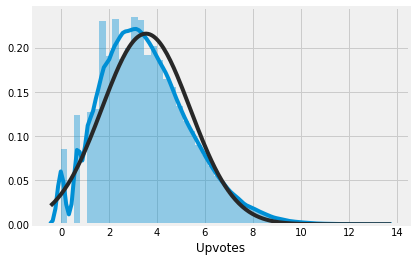

In [12]:
sns.distplot(data, fit= norm)

In [13]:
print("Skewness: %f" % data.skew())
print("Kurtosis: %f" % data.kurt())

Skewness: 0.554041
Kurtosis: 0.276728


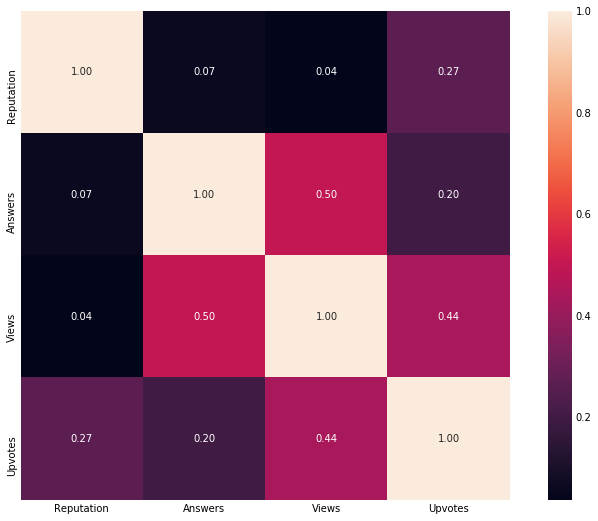

In [14]:
#correlation matrix  
corrmat = df_train[['Reputation','Answers','Views', 'Upvotes']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

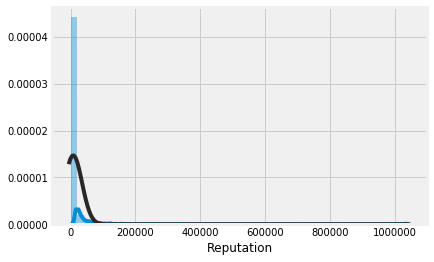

In [15]:
#histogram
from scipy.stats import norm

sns.distplot(df_train['Reputation'], fit= norm)

In [16]:
print("Skewness: %f" % df_train['Reputation'].skew())
print("Kurtosis: %f" % df_train['Reputation'].kurt())

Skewness: 11.230027
Kurtosis: 198.464137


In [17]:
from scipy.stats import boxcox

# Log transform
data = np.log(df_train['Reputation']+1)

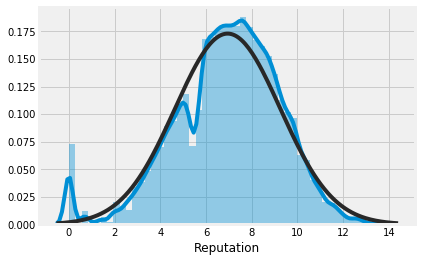

In [18]:
sns.distplot(data, fit= norm)

In [19]:
print("Skewness: %f" % data.skew())
print("Kurtosis: %f" % data.kurt())

Skewness: -0.525540
Kurtosis: 0.538215


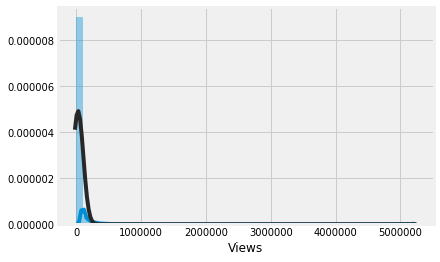

In [20]:
#histogram
from scipy.stats import norm

sns.distplot(df_train['Views'], fit= norm)

In [21]:
print("Skewness: %f" % df_train['Views'].skew())
print("Kurtosis: %f" % df_train['Views'].kurt())

Skewness: 14.370704
Kurtosis: 425.093309


In [22]:
from scipy.stats import boxcox

# Log transform
data = np.log(df_train['Views']+1)

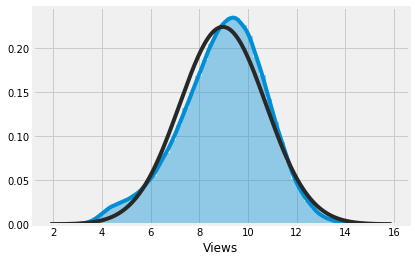

In [23]:
sns.distplot(data, fit= norm)

In [24]:
print("Skewness: %f" % data.skew())
print("Kurtosis: %f" % data.kurt())

Skewness: -0.341927
Kurtosis: 0.035976


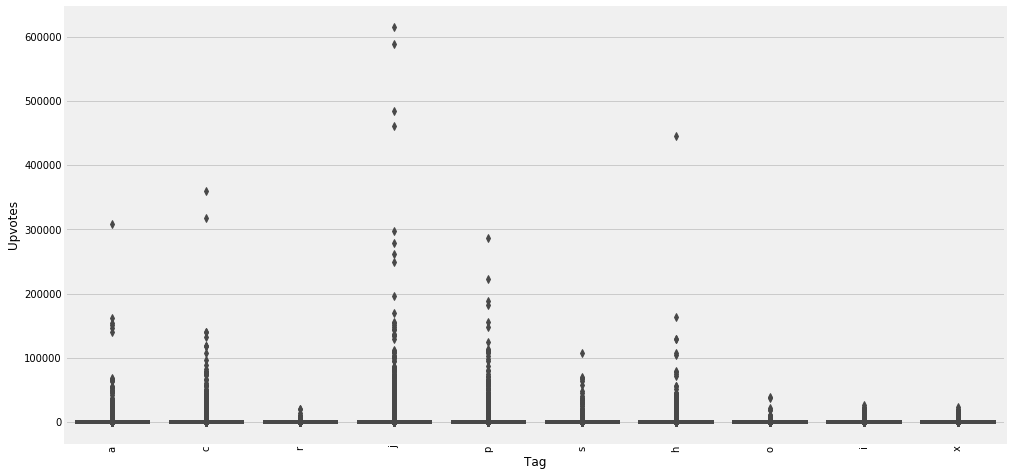

In [25]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(1, 1, 1)
plt.xticks(rotation=90)
sns.boxplot(x="Tag", y="Upvotes", data = df_train)

In [26]:
# Anova test is performed because the Tag variable having more than two levels.

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
stats.f_oneway(df_train['Upvotes'][df_train['Tag'] == 'a'], 
             df_train['Upvotes'][df_train['Tag'] == 'c'],
             df_train['Upvotes'][df_train['Tag'] == 'r'],
             df_train['Upvotes'][df_train['Tag'] == 'j'],
             df_train['Upvotes'][df_train['Tag'] == 'p'], 
             df_train['Upvotes'][df_train['Tag'] == 's'],
             df_train['Upvotes'][df_train['Tag'] == 'h'],
             df_train['Upvotes'][df_train['Tag'] == 'o'],
             df_train['Upvotes'][df_train['Tag'] == 'i'],
             df_train['Upvotes'][df_train['Tag'] == 'x'])

F_onewayResult(statistic=59.22889955589619, pvalue=5.869537372200079e-109)

In [28]:
results = ols('Upvotes ~ C(Tag)', data=df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Upvotes   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     59.23
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          5.87e-109
Time:                        14:16:13   Log-Likelihood:            -3.1700e+06
No. Observations:              330045   AIC:                         6.340e+06
Df Residuals:                  330035   BIC:                         6.340e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     316.4601     20.163     15.695      0.000     276.942     355.979
C(Tag)[T.c]    11.1098     24.174      0.460      0.646     -36.270      58.489
C(Tag)[T.h]    68.2596     32.142      2.124      0.034       5.262     131.257
C(Tag)[T.i]  -199.0735     28.359     -7.020      0.000    -254.656    -143.491
C(Tag)[T.j]   223.9046     24.185      9.258      0.000     176.502     271.307
C(Tag)[T.o]  -204.3028     35.949     -5.683      0.000    -274.763    -133.843
C(Tag)[T.p]    90.8918     26.521      3.427      0.001      38.911     142.873
C(Tag)[T.r]  -237.4329     37.976     -6.252      0.000    -311.864    -163.002
C(Tag)[T.s]   -79.4288     30.968     -2.565      0.010    -140.125     -18.733
C(Tag)[T.x]  -165.2049     47.467     -3.480      0.001    -258.238     -72.172
==============================================================================
Omnibus:                  1190749.647   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1098441840644.952
Skew:                          74.330   Prob(JB):                         0.00
Kurtosis:                    8939.089   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

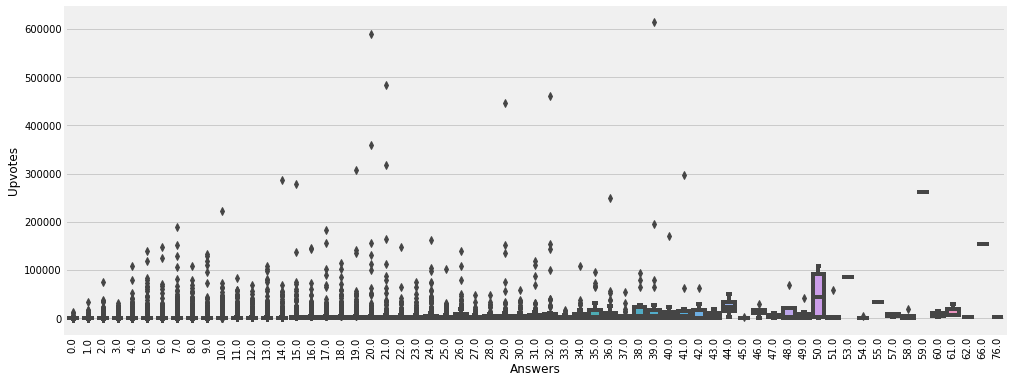

In [33]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 1, 1)
plt.xticks(rotation=90)
sns.boxplot(x="Answers", y="Upvotes", data = df_train)

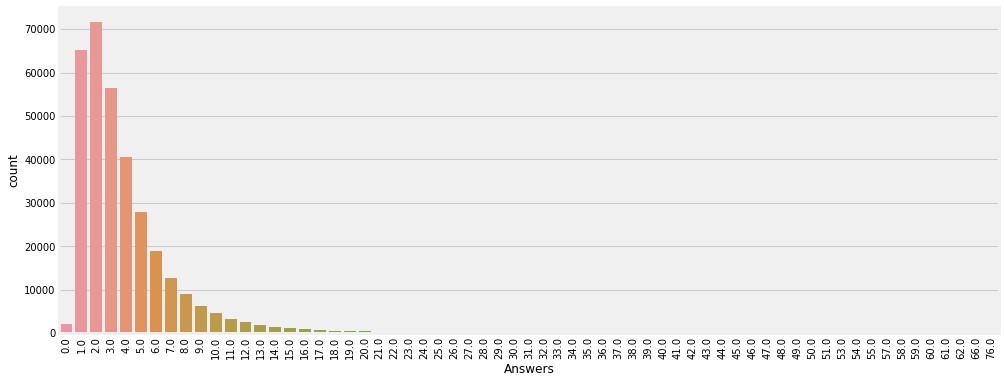

In [34]:
#Sales vs Outlet type
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 1, 1)
plt.xticks(rotation=90)
sns.countplot(x="Answers", data = df_train)

In [35]:
def f(row):
    if (row['Answers'] == 0 ):
        var = '0_<=0'
    elif (row['Answers'] <= 2 ):
        var = '1_<=2'
    elif (row['Answers'] == 3):
        var = '2_=3'
    elif (row['Answers'] <= 5): 
        var = '3_<=5'
    else:
        var = '5_>5'
    return var

In [36]:
df_train['Answers_Bin'] = df_train.apply(f, axis=1)

In [37]:
stats.f_oneway(
                df_train['Upvotes'][df_train['Answers_Bin'] == '1_<=2'], 
                df_train['Upvotes'][df_train['Answers_Bin'] == '2_=3'],
                df_train['Upvotes'][df_train['Answers_Bin'] == '3_=4'],
                df_train['Upvotes'][df_train['Answers_Bin'] == '4_=5'],
                df_train['Upvotes'][df_train['Answers_Bin'] == '5_>5'] 
            )

F_onewayResult(statistic=nan, pvalue=nan)

In [38]:
results = ols('Upvotes ~ C(Answers_Bin)', data=df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Upvotes   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1074.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:17:20   Log-Likelihood:            -3.1681e+06
No. Observations:              330045   AIC:                         6.336e+06
Df Residuals:                  330040   BIC:                         6.336e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  32.9059     78.224      0.421      0.674    -120.412     186.224
C(Answers_Bin)[T.1_<=2]    41.1780     78.818      0.522      0.601    -113.303     195.659
C(Answers_Bin)[T.2_=3]    103.9124     79.657      1.304      0.192     -52.213     260.038
C(Answers_Bin)[T.3_<=5]   228.7884     79.407      2.881      0.004      73.153     384.423
C(Answers_Bin)[T.5_>5]   1102.7606     79.438     13.882      0.000     947.064    1258.457
==============================================================================
Omnibus:                  1194665.583   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1135813174254.468
Skew:                          75.072   Prob(JB):                         0.00
Kurtosis:                    9089.847   Cond. No.                         32.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### One Hot Encoding

In [39]:
Answers_Bin = pd.get_dummies(df_train['Answers_Bin'])

In [53]:
Tags_Bin = pd.get_dummies(df_train['Tag'])

In [40]:
df_train = pd.concat([df_train,Answers_Bin], axis=1)

In [54]:
df_train = pd.concat([df_train,Tags_Bin], axis=1)

In [55]:
df_train.sample(5)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answers_Bin,0_<=0,1_<=2,2_=3,3_<=5,5_>5,Count_By_Username,Average_By_Username_Reputation,Average_By_Username_Views,Join_Both_Columns,Count_By_Both,Average_By_Both_Reputation,Average_By_Both_Views,0,1,2,3,4,5,6,7,8,9
180023,1347,3,1585.0,4.0,24789,12111.0,316.0,3_<=5,0,0,0,1,0,2,1585.0,9337.0,24789_3,2,1585.0,9337.000000,0,0,0,1,0,0,0,0,0,0
164504,443982,1,33.0,4.0,94692,910.0,4.0,3_<=5,0,0,0,1,0,1,33.0,910.0,94692_1,1,33.0,910.000000,0,1,0,0,0,0,0,0,0,0
268858,448150,4,182.0,2.0,78347,834.0,5.0,1_<=2,0,1,0,0,0,1,182.0,834.0,78347_4,1,182.0,834.000000,0,0,0,0,1,0,0,0,0,0
90526,174845,8,799.0,2.0,121659,11318.0,14.0,1_<=2,0,1,0,0,0,6,799.0,11594.0,121659_8,3,799.0,9840.666667,0,0,0,0,0,0,0,0,1,0
58695,6258,4,68.0,4.0,157678,23139.0,7.0,3_<=5,0,0,0,1,0,1,68.0,23139.0,157678_4,1,68.0,23139.000000,0,0,0,0,1,0,0,0,0,0


In [42]:
df_train.describe()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,0_<=0,1_<=2,2_=3,3_<=5,5_>5
count,330045.000000,330045.00000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000,330045.000000,330045.000000,330045.000000,330045.000000,330045.000000
mean,235748.682789,3.54305,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358,0.006308,0.414207,0.170677,0.207111,0.201697
std,136039.418471,2.49392,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135,0.079174,0.492585,0.376227,0.405236,0.401268
min,1.000000,0.00000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117909.000000,1.00000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,235699.000000,4.00000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,353620.000000,6.00000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,471493.000000,9.00000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df_train[df_train['Username'] == 86628 ]

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answers_Bin,0_<=0,1_<=2,2_=3,3_<=5,5_>5
115780,133476,0,345.0,4.0,86628,38970.0,10.0,3_<=5,0,0,0,1,0
153631,128240,1,415.0,2.0,86628,50.0,2.0,1_<=2,0,1,0,0,0
161442,67677,3,1080.0,3.0,86628,1534.0,5.0,2_=3,0,0,1,0,0


In [44]:
df_train['Count_By_Username'] = df_train['Username'].groupby(df_train['Username']).transform('count')

In [45]:
df_train['Average_By_Username_Reputation'] = df_train['Reputation'].groupby(df_train['Username']).transform('mean')

In [46]:
df_train['Average_By_Username_Views'] = df_train['Views'].groupby(df_train['Username']).transform('mean')

In [47]:
df_train['Join_Both_Columns'] = df_train['Username'].astype(str)+ str("_")+ df_train['Tag'].astype(str)

In [48]:
df_train['Count_By_Both'] = df_train['Username'].groupby(df_train['Join_Both_Columns']).transform('count')

In [49]:
df_train['Average_By_Both_Reputation'] = df_train['Reputation'].groupby(df_train['Join_Both_Columns']).transform('mean')

In [50]:
df_train['Average_By_Both_Views'] = df_train['Views'].groupby(df_train['Join_Both_Columns']).transform('mean')

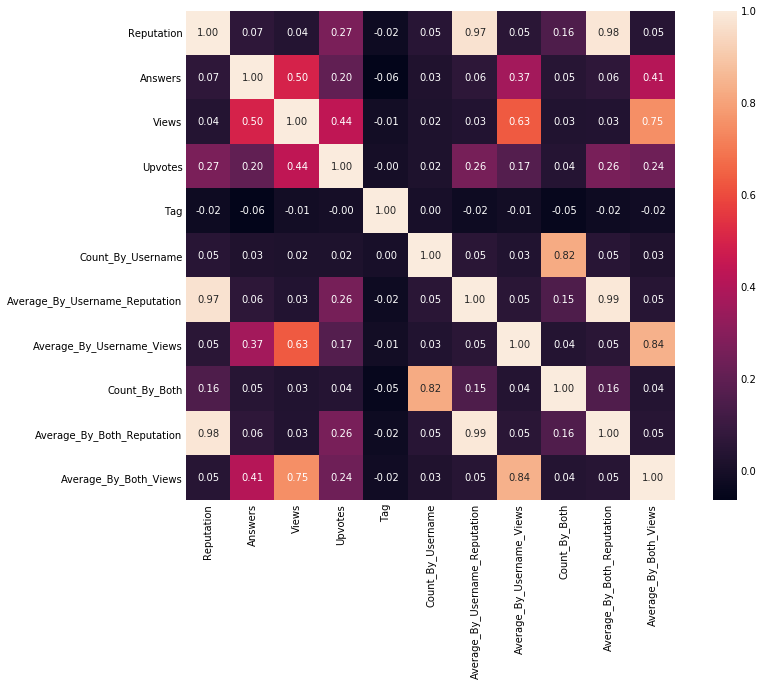

In [52]:
#correlation matrix  
corrmat = df_train[['Reputation','Answers','Views', 'Upvotes','Tag', 'Count_By_Username','Average_By_Username_Reputation','Average_By_Username_Views','Join_Both_Columns','Count_By_Both','Average_By_Both_Reputation','Average_By_Both_Views']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In [51]:
df_train.head(5)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answers_Bin,0_<=0,1_<=2,2_=3,3_<=5,5_>5,Count_By_Username,Average_By_Username_Reputation,Average_By_Username_Views,Join_Both_Columns,Count_By_Both,Average_By_Both_Reputation,Average_By_Both_Views
0,52664,0,3942.0,2.0,155623,7855.0,42.0,1_<=2,0,1,0,0,0,19,3942.0,24519.000000,155623_0,8,3942.0,18691.375000
1,327662,0,26046.0,12.0,21781,55801.0,1175.0,5_>5,0,0,0,0,1,2,26046.0,33209.500000,21781_0,1,26046.0,55801.000000
2,468453,1,1358.0,4.0,56177,8067.0,60.0,3_<=5,0,0,0,1,0,1,1358.0,8067.000000,56177_1,1,1358.0,8067.000000
3,96996,0,264.0,3.0,168793,27064.0,9.0,2_=3,0,0,1,0,0,3,264.0,19551.333333,168793_0,1,264.0,27064.000000
4,131465,1,4271.0,4.0,112223,13986.0,83.0,3_<=5,0,0,0,1,0,3,4271.0,20598.666667,112223_1,3,4271.0,20598.666667


In [56]:
df_train = df_train.drop(['ID','Tag','Answers','Username','Answers_Bin','Count_By_Username','Average_By_Username_Reputation','Average_By_Username_Views','Join_Both_Columns','Average_By_Both_Reputation'],axis=1)

In [57]:
df_train.head(5)

,Reputation,Views,Upvotes,0_<=0,1_<=2,2_=3,3_<=5,5_>5,Count_By_Both,Average_By_Both_Views,0,1,2,3,4,5,6,7,8,9
0,3942.0,7855.0,42.0,0,1,0,0,0,8,18691.375000,1,0,0,0,0,0,0,0,0,0
1,26046.0,55801.0,1175.0,0,0,0,0,1,1,55801.000000,1,0,0,0,0,0,0,0,0,0
2,1358.0,8067.0,60.0,0,0,0,1,0,1,8067.000000,0,1,0,0,0,0,0,0,0,0
3,264.0,27064.0,9.0,0,0,1,0,0,1,27064.000000,1,0,0,0,0,0,0,0,0,0
4,4271.0,13986.0,83.0,0,0,0,1,0,3,20598.666667,0,1,0,0,0,0,0,0,0,0


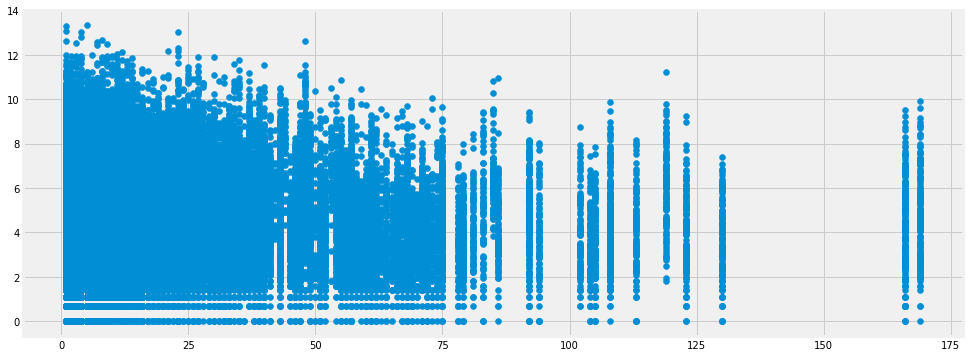

In [110]:
plt.scatter(df_train['Count_By_Both'], df_train['Upvotes'])

In [58]:
df_train['Reputation'] = np.log(df_train['Reputation']+1)

In [59]:
df_train['Views'] = np.log(df_train['Views']+1)

In [60]:
df_train['Upvotes'] = np.log(df_train['Upvotes']+1)

In [61]:
df_train['Average_By_Both_Views'] = np.log(df_train['Average_By_Both_Views']+1)

In [111]:
df_train['Count_By_Both'] = np.log(df_train['Count_By_Both']+1)

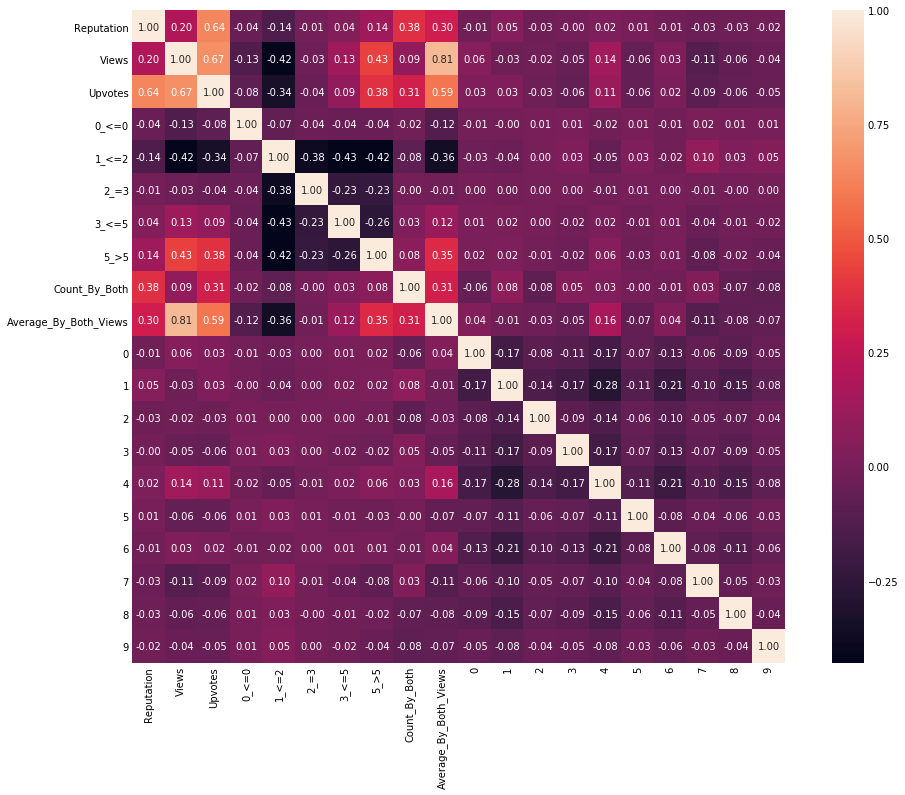

In [112]:
#correlation matrix  
corrmat = df_train[['Reputation','Views','Upvotes','0_<=0','1_<=2','2_=3','3_<=5','5_>5','Count_By_Both','Average_By_Both_Views',0,1,2,3,4,5,6,7,8,9]].corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

### Modelling

In [124]:
x = df_train.drop(['Upvotes','Average_By_Both_Views'],axis=1)

In [125]:
y = df_train['Upvotes']

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.30, random_state = 42)

In [127]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
y_pred = lr.predict(x_val)

In [129]:
y_pred = np.exp(y_pred) 

In [130]:
y_val = np.exp(y_val) 

In [131]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse = sqrt(mean_squared_error(y_val, y_pred))

In [132]:
print(rmse)

3546.1141534196013


In [133]:
np.corrcoef(y_val, y_pred)

array([[1.       , 0.6616101],
       [0.6616101, 1.       ]])

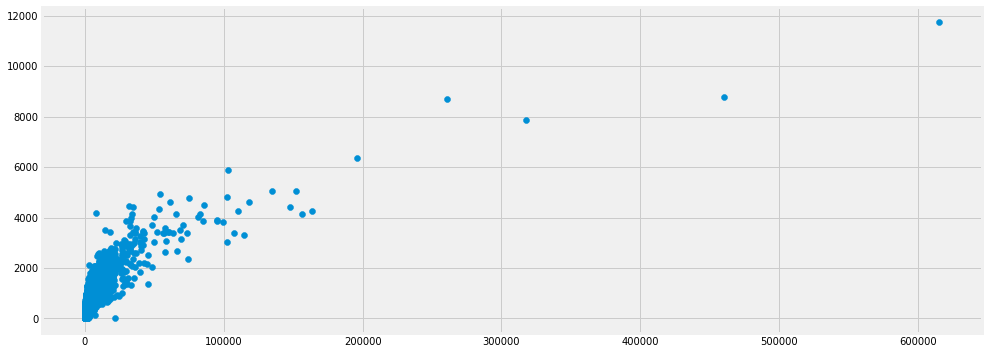

In [134]:
plt.scatter(y_val, y_pred)

In [135]:
from sklearn.metrics import r2_score

In [136]:
r2_score(y_val, y_pred)

0.07304987023632181

In [137]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [138]:
model1=sm.OLS(y_train,x_train)

In [139]:
result=model1.fit()

In [140]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Upvotes   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 3.814e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:57:14   Log-Likelihood:            -3.1969e+05
No. Observations:              231031   AIC:                         6.394e+05
Df Residuals:                  231014   BIC:                         6.396e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Reputation        0.3986      0.001    415.054